In [34]:
# json
import json

# math
import math

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Random libraries and seeds:
import random
random.seed(2)
np.random.seed(2)

pd.set_option('display.max_columns', None)

In [35]:
# From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [36]:
data = pd.read_csv("terrorism_cleaned_group.csv")

In [37]:
data["gname"].value_counts()

Other                                                                        14349
Taliban                                                                       4762
Shining Path (SL)                                                             4134
Islamic State of Iraq and the Levant (ISIL)                                   2372
Farabundo Marti National Liberation Front (FMLN)                              2129
Revolutionary Armed Forces of Colombia (FARC)                                 2037
Basque Fatherland and Freedom (ETA)                                           1903
Irish Republican Army (IRA)                                                   1884
Boko Haram                                                                    1700
Communist Party of India - Maoist (CPI-Maoist)                                1612
New People's Army (NPA)                                                       1506
Al-Shabaab                                                                    1360
Nati

In [38]:
data

,iyear,multiple,success,suicide,nperps,nperpcap,nkill,nwound,nhostkid,ransomamt,ransompaid,nreleased,region_txt,gname
0,1970,0,1,0,7,0,0.0,0.0,1.0,800000.0,0.0,0.0,North America,Other
1,1970,0,1,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,North America,Other
2,1970,0,0,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,South America,Other
3,1970,0,1,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,North America,Other
4,1970,0,1,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,North America,Other
5,1970,0,1,0,4,0,0.0,1.0,0.0,0.0,0.0,0.0,North America,Other
6,1970,0,1,0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,South America,Other
7,1970,0,1,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,North America,Other
8,1970,0,1,0,4,0,0.0,2.0,0.0,0.0,0.0,0.0,North America,Other
9,1970,0,1,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,North America,Other


In [39]:
data["region_txt"].value_counts()

South Asia                     11497
South America                  10880
Middle East & North Africa      8216
Western Europe                  7135
Sub-Saharan Africa              5570
Central America & Caribbean     3850
Southeast Asia                  3304
North America                   1117
Eastern Europe                   199
East Asia                        159
Australasia & Oceania             58
Central Asia                      44
Name: region_txt, dtype: int64

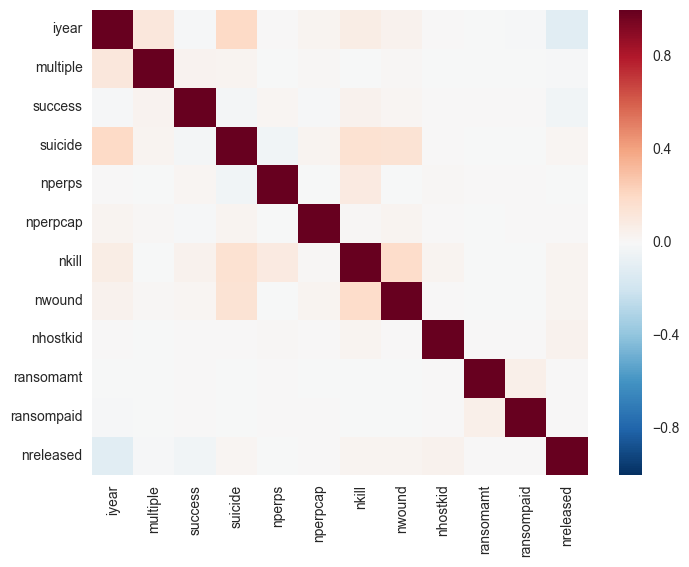

In [40]:
def plotCorrelations(data):
    plt.figure(figsize=(8, 6), dpi=500)
    corr = data.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    
plotCorrelations(data)

In [79]:
import sklearn.model_selection as mds
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

predictions = []

for region in data["region_txt"].unique():
    data_region = data[data["region_txt"] == region]
    X = data_region.drop(["gname", "region_txt"], axis=1)
    Y = data_region["gname"]
    
    # 70% train, 30% test
    msk = np.random.rand(len(data_region)) < 0.7
    
    X_train = X[msk]
    Y_train = Y[msk]
    
    X_test = X[~msk]
    Y_test = Y[~msk]
    
    Y_pred = OneVsRestClassifier(RandomForestClassifier(random_state=2)).fit(X_train, Y_train).predict(X_test)
    
    print("%s, %d/%d => %s" % (region, sum(Y_pred == Y_test), len(Y_pred), (sum(Y_pred == Y_test) / len(Y_pred))))
    print(data_region["gname"].value_counts())
    print("\n")
    
    predictions.append([Y_test.values, Y_pred, data_region["region_txt"].unique()])

North America, 243/349 => 0.696275071633
Other                                            692
Fuerzas Armadas de Liberacion Nacional (FALN)    117
New World Liberation Front (NWLF)                 85
Animal Liberation Front (ALF)                     79
Jewish Defense League (JDL)                       74
Earth Liberation Front (ELF)                      70
Name: gname, dtype: int64


South America, 1858/3258 => 0.570288520565
Shining Path (SL)                                4134
Other                                            2152
Revolutionary Armed Forces of Colombia (FARC)    2037
National Liberation Army of Colombia (ELN)       1236
Manuel Rodriguez Patriotic Front (FPMR)           799
Tupac Amaru Revolutionary Movement (MRTA)         522
Name: gname, dtype: int64


Western Europe, 989/2081 => 0.475252282556
Other                                        2249
Basque Fatherland and Freedom (ETA)          1903
Irish Republican Army (IRA)                  1884
Corsican National Liberat

In [80]:
predictions

[[array(['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
         'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
         'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
         'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
         'Other', 'Jewish Defense League (JDL)', 'Other', 'Other', 'Other',
         'Other', 'Other', 'Other', 'Jewish Defense League (JDL)', 'Other',
         'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
         'Other', 'Other', 'Other', 'Jewish Defense League (JDL)', 'Other',
         'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
         'Jewish Defense League (JDL)', 'Other', 'Other', 'Other', 'Other',
         'Other', 'Other', 'Jewish Defense League (JDL)', 'Other', 'Other',
         'Other', 'Other', 'Other', 'Other', 'Jewish Defense League (JDL)',
         'Other', 'Jewish Defense League (JDL)', 'Other', 'Other',
         'Jewish Defense League (JDL)', 'Other', 'Othe

In [81]:
type(predictions[0][0].values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [82]:
plot_confusion_matrix(confusion_matrix(predictions[0][0],
                                       predictions[0][1],
                                       labels = predictions[0][2]),
                                       classes = predictions[0][2])


ValueError: At least one label specified must be in y_true

In [56]:
rf = RandomForestClassifier(random_state = 2).fit(X_train, Y_train)

In [57]:
X_train.columns.values

array(['iyear', 'multiple', 'success', 'suicide', 'nperps', 'nperpcap',
       'nkill', 'nwound', 'nhostkid', 'ransomamt', 'ransompaid',
       'nreleased'], dtype=object)

In [58]:
rf.feature_importances_

array([ 0.38011603,  0.10249377,  0.        ,  0.03079947,  0.05995833,
        0.        ,  0.16000133,  0.11178653,  0.12672397,  0.        ,
        0.        ,  0.02812056])